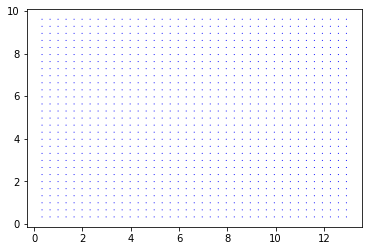

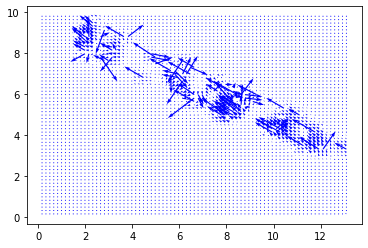

In [6]:
import sys

from openpiv import tools, process, scaling, validation, filters
import numpy as np

import os

# we can run it from any folder
path = os.path.dirname(os.path.abspath(r'C:\Users\Manmo\Desktop\School\Fourth_Year_Project'))


frame_a  = tools.imread(os.path.join(path,r'C:\Users\Manmo\Desktop\School\Fourth_Year_Project\mightex-camera\Feb282020_imageprocessing\singleparticle1.jpg'))
frame_b  = tools.imread(os.path.join(path,r'C:\Users\Manmo\Desktop\School\Fourth_Year_Project\mightex-camera\Feb282020_imageprocessing\singleparticle2.jpg'))

frame_a = (frame_a*1024).astype(np.int32)
frame_b = (frame_b*1024).astype(np.int32)

u, v, sig2noise = process.extended_search_area_piv( frame_a, frame_b, \
    window_size=64, overlap=32, dt=0.02, search_area_size=64, sig2noise_method='peak2peak' )

x, y = process.get_coordinates( image_size=frame_a.shape, window_size=64, overlap=32 )
u, v, mask = validation.sig2noise_val( u, v, sig2noise, threshold = 1.3 )
u, v, mask = validation.global_val( u, v, (-1000, 2000), (-1000, 1000) )
u, v = filters.replace_outliers( u, v, method='localmean', max_iter=10, kernel_size=2)
x, y, u, v = scaling.uniform(x, y, u, v, scaling_factor = 96.52 )
tools.save(x, y, u, v, mask, 'singleparticle.vec' )

tools.display_vector_field('singleparticle.vec', scale=75, width=0.0035)
tools.display_vector_field('imageJedited.vec', scale=75, width=0.0035)


#tools.display_vector_field('windowsize_24.vec', scale=75, width=0.0035)
#tools.display_vector_field('windowsize_32.vec', scale=75, width=0.0035)
#tools.display_vector_field('windowsize_64.vec', scale=75, width=0.0035)


# tools.display_vector_field('threshold_1.0.vec', scale=75, width=0.0035)
# tools.display_vector_field('threshold_1.2.vec', scale=75, width=0.0035)
# tools.display_vector_field('threshold_1.3.vec', scale=75, width=0.0035)
# tools.display_vector_field('threshold_1.4.vec', scale=75, width=0.0035)


